# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
#Visualización
from matplotlib import pyplot as plt
from matplotlib import cm

%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns

# Librerías de modelado
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

In [2]:
# Diseño de la visualización
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
age = [17,51,27,21,36,48,19,26,54,30]
tardies = [10,1,5,9,4,2,9,6,0,3]

In [4]:
student_data = pd.DataFrame({"age":age, "tardies":tardies})
#student_data

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='age', ylabel='tardies'>

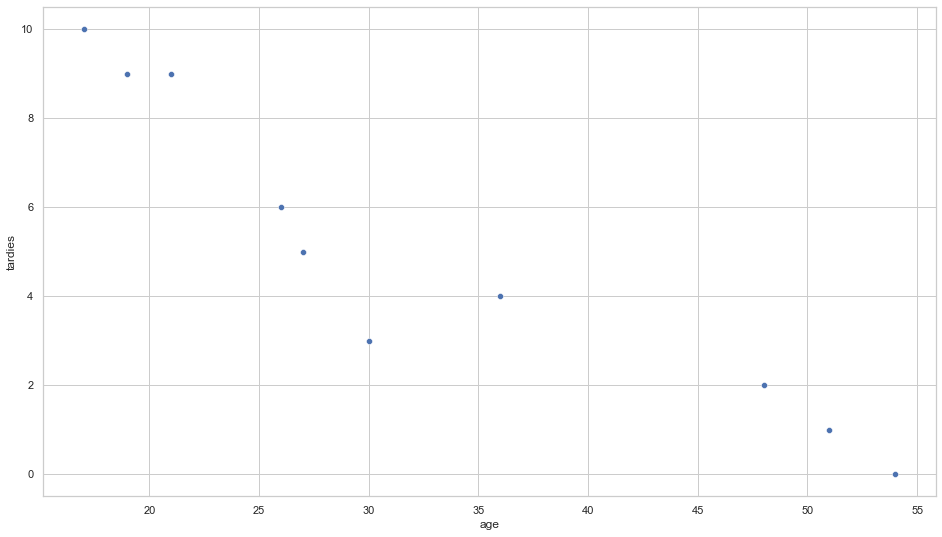

In [5]:
sns.scatterplot(data= student_data, x="age", y="tardies")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

**RESPUESTA: Se puede percibir cierta tendencia lineal en materia a: cuanto más mayor sea el estudiante, más tarde llega a clase*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
#covarianza
student_data.cov()

,age,tardies
age,187.655556,-45.566667
tardies,-45.566667,12.544444


In [7]:
#correlación
student_data.corr()

,age,tardies
age,1.000000,-0.939163
tardies,-0.939163,1.000000


**RESPUESTA: Ambas medidas (covarianza y correlación) miden si existe una relación lineal con respecto a la otra. Sin embargo el uso de la correlación es preferible al uso de la covarianza ya que ofrece más información y puede ser empleada como métdodo de comparación con otros modelos. La covarianza se limita a mostrar si la relación es positiva o negativa mientras que la correlación a parte también nos dice como de "disperso,fuerte" es dicha relación.*

*Con respecto a este caso de estudio la covarianza y la correlación nos muestran que se trata de una relación negativa es decir indirectamente proporcional (cuando una variable aumente la otra disminuirá y viceversa). Además están bastante correlacionadas ya que nos acercamos bastante a la unidad (-0,94).*

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
#creamos el modelo
lr = LinearRegression()

In [9]:
#le pasamos los datos
lr.fit(
    
    X = student_data[["age"]],
    y = student_data.tardies
)

LinearRegression()

In [10]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

[beta_1.round(3), beta_0.round(3)]

[-0.243, 12.889]

In [11]:
X = student_data[["age"]]
y = student_data.tardies

In [12]:
#predicción
y_hat= beta_0 + beta_1 * X

Plot your regression model on your scatter plot.

<function matplotlib.pyplot.show(close=None, block=None)>

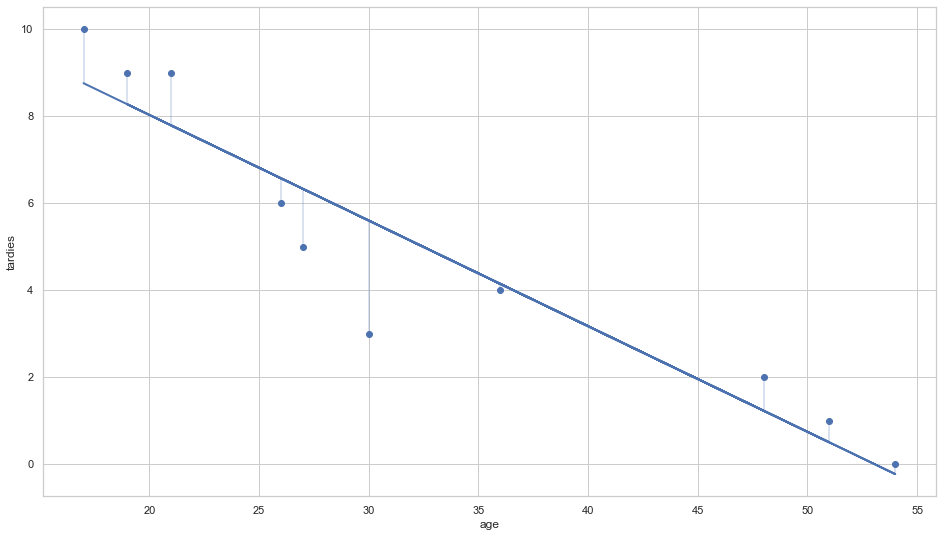

In [13]:
plt.scatter(X,y)
plt.plot(X, y_hat, lw=2)
plt.vlines(X, y_hat, y, lw=0.4)
plt.xlabel("age")
plt.ylabel("tardies")
plt.show

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [14]:
#mean_prediction
mean_prediction = [student_data.tardies.mean()] * student_data.age.size

#TSS
TSS = ((student_data.tardies - mean_prediction) ** 2).sum()
TSS

112.9

In [15]:
student_data["predict_model"] = student_data.age * beta_1 + beta_0
student_data.head()

,age,tardies,predict_model
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256


In [16]:
#RSS
RSS = ((student_data.tardies - student_data.predict_model) **2 ).sum()
RSS

13.319201847356268

In [17]:
#R^2
r2 = (TSS - RSS) / (TSS)
r2

0.8820265558250109

**RESPUESTA: La r^2 se encuentra bastante cerca de la unidad, es decir, es bastante alta lo que indica que explica el 88% de los datos de estudio, lo que conlleva a que la edad sea una variable buena para predecir la llegada (tiempo) de los estudiantes a clase.*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [18]:
df_veh = pd.read_csv("vehicles.csv")
df_veh.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [19]:
df_veh.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


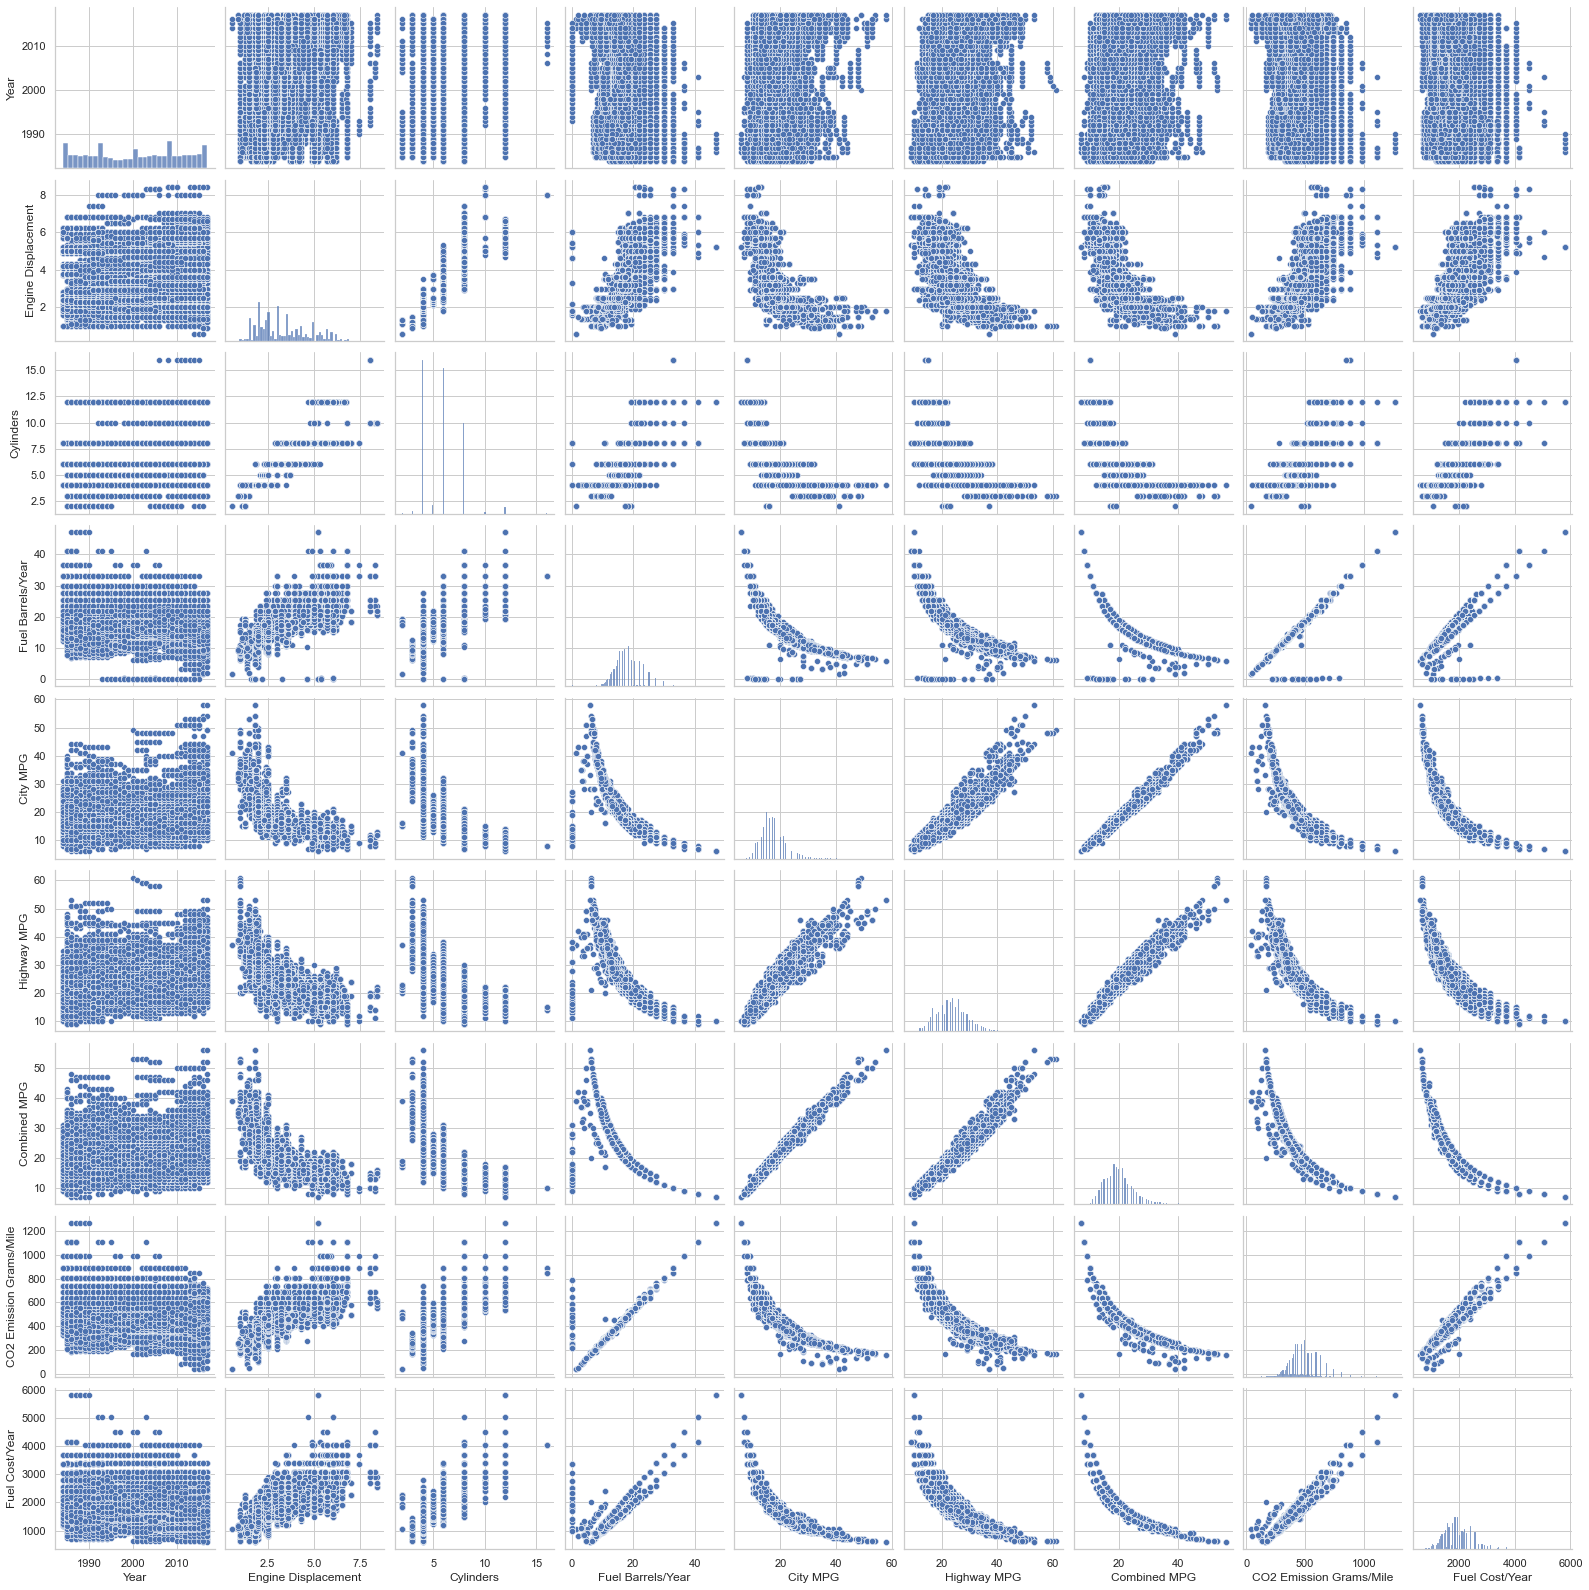

In [20]:
#data = df_veh.corr()
#sns.heatmap(data)
sns.pairplot(df_veh)

**RESPUESTA:*
- *La variable que presenta un mayor grado de correlación con respecto a las emisiones de CO2 es Fuel Barrels/Year*
- *La variable que presenta un menor grado de correlación con respecto a las emisiones de C02 son los años*

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [21]:
df_veh.columns = df_veh.columns.str.replace(" ", "_").str.replace("/", "_per_")

In [22]:
# para realizar el modelo de regresión voy a tomar la variable que tiene más correlación
results = smf.ols("CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year", data=df_veh).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.973
Model:                                     OLS   Adj. R-squared:                  0.973
Method:                          Least Squares   F-statistic:                 1.275e+06
Date:                         Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                                 08:41:54   Log-Likelihood:            -1.5821e+05
No. Observations:                        35952   AIC:                         3.164e+05
Df Residuals:                            35950   BIC:                         3.164e+05
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.4865      0.423     29.523      0.000      11.658      13.316
Fuel_Barrels_per_Year    26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.961
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Tenemos un r^2 bastante alto
#La P se encuentra por debajo de 0,05 lo que significa que es significativa e influyente
#Vamos a añadir más variables:

In [24]:
#añadimos la segunda variable que tiene más correlación
results = smf.ols("CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year + Fuel_Cost_per_Year", data=df_veh).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.977
Model:                                     OLS   Adj. R-squared:                  0.977
Method:                          Least Squares   F-statistic:                 7.708e+05
Date:                         Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                                 08:41:54   Log-Likelihood:            -1.5487e+05
No. Observations:                        35952   AIC:                         3.098e+05
Df Residuals:                            35949   BIC:                         3.098e+05
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                10.0210      0.387     25.924      0.000       9.263      10.779
Fuel_Barrels_per_Year    22.1302      0.053    417.913      0.000      22.026      22.234
Fuel_Cost_per_Year        0.0399      0.000     85.609      0.000       0.039       0.041
==============================================================================
Omnibus:                    78651.444   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        451445567.696
Skew:                          20.059   Prob(JB):                         0.00
Kurtosis:                     550.500   Cond. No.                     8.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#hemos obtenido un r^2 bastante superior y mayor que el anterior.
#observamos que la nueva variable sigue siendo significativa al ser menor a 0,05.
#añadimos otra variable para ver si podemos obtener un r^2 superior.

In [26]:
#añadimos la siguiente variable que presenta una mayor correlación
results = smf.ols("CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year + Fuel_Cost_per_Year + Combined_MPG", data=df_veh).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.980
Model:                                     OLS   Adj. R-squared:                  0.980
Method:                          Least Squares   F-statistic:                 5.932e+05
Date:                         Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                                 08:41:54   Log-Likelihood:            -1.5235e+05
No. Observations:                        35952   AIC:                         3.047e+05
Df Residuals:                            35948   BIC:                         3.047e+05
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               131.6742      1.691     77.861      0.000     128.359     134.989
Fuel_Barrels_per_Year    19.6955      0.059    331.484      0.000      19.579      19.812
Fuel_Cost_per_Year        0.0317      0.000     70.466      0.000       0.031       0.033
Combined_MPG             -3.1661      0.043    -73.626      0.000      -3.250      -3.082
==============================================================================
Omnibus:                    72593.271   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277905639.131
Skew:                          16.687   Prob(JB):                         0.00
Kurtosis:                     432.423   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
results = smf.ols("CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year + Fuel_Cost_per_Year + Combined_MPG + Highway_MPG", data=df_veh).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.981
Model:                                     OLS   Adj. R-squared:                  0.981
Method:                          Least Squares   F-statistic:                 4.708e+05
Date:                         Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                                 08:41:54   Log-Likelihood:            -1.5135e+05
No. Observations:                        35952   AIC:                         3.027e+05
Df Residuals:                            35947   BIC:                         3.028e+05
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               152.9726      1.711     89.419      0.000     149.619     156.326
Fuel_Barrels_per_Year    18.8083      0.061    308.240      0.000      18.689      18.928
Fuel_Cost_per_Year        0.0352      0.000     79.359      0.000       0.034       0.036
Combined_MPG             -0.3845      0.074     -5.175      0.000      -0.530      -0.239
Highway_MPG              -2.8431      0.063    -45.299      0.000      -2.966      -2.720
==============================================================================
Omnibus:                    70140.473   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        227497472.245
Skew:                          15.454   Prob(JB):                         0.00
Kurtosis:                     391.474   Cond. No.                     3.90e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

**RESPUESTA: Después de ir añadiendo variables parece ser que la más significativa es Fuel Barrels/Year ya que explica el 97,3% de las emisiones de C02 predichas, el hecho de haberle sumado variables a nuestro modelo inicial lo enriquecía y lo hacía más preciso y fiable, sin embargo el aumento que se producía sobre r^2 tampoco era muy significativo especialmente en la última Highway MPG.*

*Por lo que si tuviera que decirme por un modelo sería el primero o segundo. (Tienen r^2 bastante altas que explican y pueden producir casi el 99% de las emisiones de C02.*

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [28]:
#Cuanta más gente invito hay más aburridos (que dicen que no vienen)

In [29]:
x = [1, 3, 4, 6, 8, 9, 11, 14]
y = [1, 2, 4, 4, 5, 7, 8, 13]

In [30]:
party_data = pd.DataFrame({"invitados": x, "asistentes": y})
party_data

,invitados,asistentes
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [31]:
#aburridos = personas que fueron invitadas y no acudieron a la fiesta
party_data["aburridos"] = party_data.invitados - party_data.asistentes
party_data

,invitados,asistentes,aburridos
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3
7,14,13,1


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [32]:
lr2 = LinearRegression()

In [33]:
lr2.fit(
    X = party_data[["invitados"]],
    y = party_data.aburridos
)

LinearRegression()

In [34]:
beta_2_1 = lr2.coef_[0]
beta_2_0 = lr2.intercept_

[beta_2_1.round(3), beta_2_0.round(3)]

[0.152, 0.439]

In [35]:
X2 = party_data[["invitados"]]
y2 = party_data.aburridos

In [36]:
y_hat2= beta_2_0 + beta_2_1 * X2

In [37]:
party_data["predict_aburridos"] = round(y_hat2, 3)
party_data

,invitados,asistentes,aburridos,predict_aburridos
0,1,1,0,0.591
1,3,2,1,0.894
2,4,4,0,1.045
3,6,4,2,1.348
4,8,5,3,1.652
5,9,7,2,1.803
6,11,8,3,2.106
7,14,13,1,2.561


<function matplotlib.pyplot.show(close=None, block=None)>

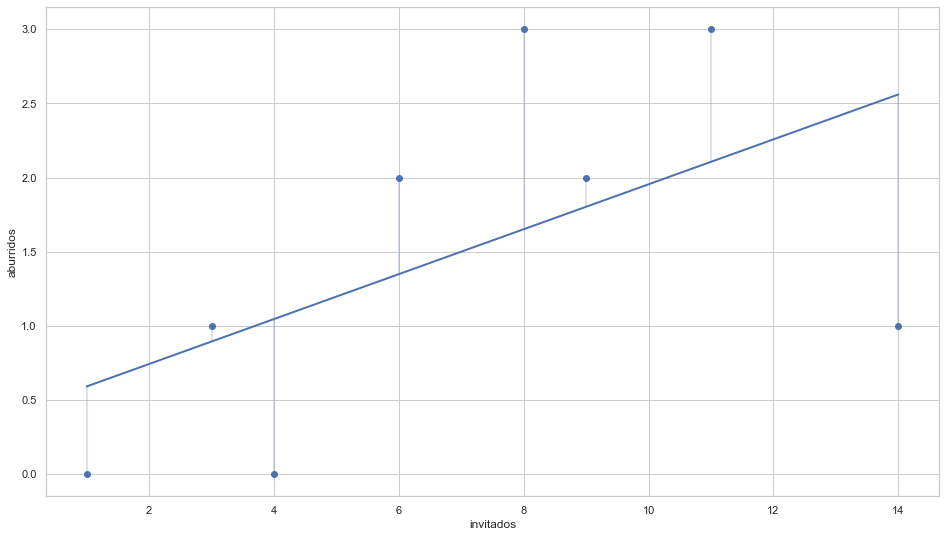

In [38]:
plt.scatter(X2,y2)
plt.plot(X2, y_hat2, lw=2)
plt.vlines(X2, y_hat2, y2, lw=0.4)
plt.xlabel("invitados")
plt.ylabel("aburridos")
plt.show

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [39]:
#r^2
lr2.score(X2,y2)

0.3030303030303031

In [40]:
#party_data.corr()

**RESPUESTA: En general, podemos observar que hay cierta relación entre el número de invitados y el número de aburridos, pero dicha relación no es muy "fuerte", además nos encontramos con un r^2 bastante bajo el cual no llega a explicar ni siquiera la mitad de los datos*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [41]:
party_data

,invitados,asistentes,aburridos,predict_aburridos
0,1,1,0,0.591
1,3,2,1,0.894
2,4,4,0,1.045
3,6,4,2,1.348
4,8,5,3,1.652
5,9,7,2,1.803
6,11,8,3,2.106
7,14,13,1,2.561


In [42]:
#observamos dos puntos problemáticos, los casos 2 y 7 en el que nuestro modelo se desvía demasiado.
#procedemos a eliminarlos.

In [43]:
party_data2 = party_data.drop([party_data.index[2], party_data.index[7]])
party_data2

,invitados,asistentes,aburridos,predict_aburridos
0,1,1,0,0.591
1,3,2,1,0.894
3,6,4,2,1.348
4,8,5,3,1.652
5,9,7,2,1.803
6,11,8,3,2.106


In [44]:
#con estos nuevos datos procedemos a comprobar si nuestro r^2 es más elevado y por tanto si obtenemos un modelo más fiable

In [45]:
#creamos el nuevo modelo
lr3 = LinearRegression()
lr3.fit(
    X = party_data2[["invitados"]],
    y = party_data2.aburridos
)
beta_3_1 = lr3.coef_[0]
beta_3_0 = lr3.intercept_

[beta_3_1.round(3), beta_3_0.round(3)]

[0.285, 0.028]

<function matplotlib.pyplot.show(close=None, block=None)>

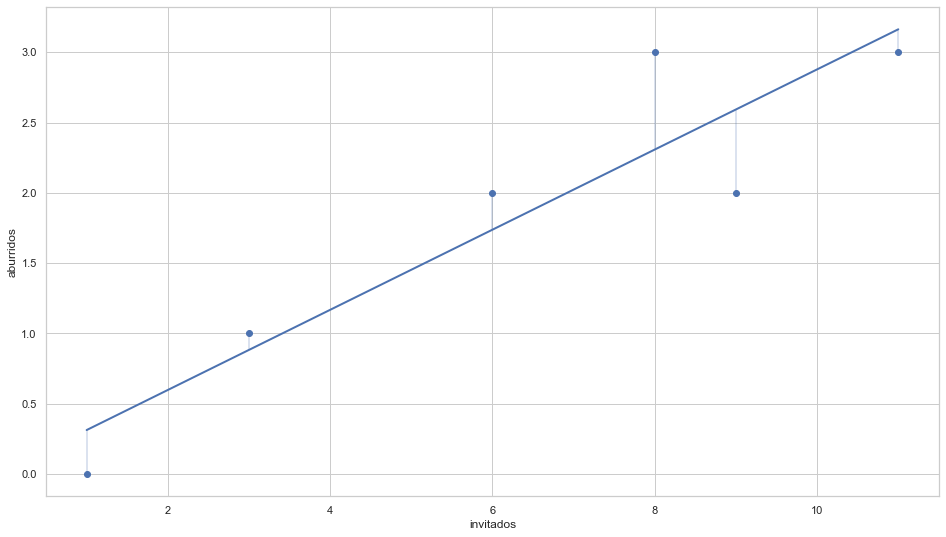

In [46]:
X3 = party_data2[["invitados"]]
y3 = party_data2.aburridos

y_hat3= beta_3_0 + beta_3_1 * X3

plt.scatter(X3,y3)
plt.plot(X3, y_hat3, lw=2)
plt.vlines(X3, y_hat3, y3, lw=0.4)
plt.xlabel("invitados")
plt.ylabel("aburridos")
plt.show

In [47]:
#r^2
lr2.score(X3,y3)

0.4964052946314589

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [48]:
#tras eliminar esos datos hemos mejorado la fiabilidad de nuestro modelo pero la r^2 sigue siendo muy baja.

In [49]:
#trasteando

In [50]:
results = smf.ols("invitados ~ aburridos", data=party_data2).fit()
results.summary()

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              invitados   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     22.35
Date:                Wed, 07 Jul 2021   Prob (F-statistic):            0.00912
Time:                        08:42:00   Log-Likelihood:                -10.285
No. Observations:                   6   AIC:                             24.57
Df Residuals:                       4   BIC:                             24.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8780      1.335      0.658      0.547      -2.829       4.585
aburridos      2.9756      0.629      4.727      0.009       1.228       4.723
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.723
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.451
Skew:                           0.334   Prob(JB):                        0.798
Kurtosis:                       1.835   Cond. No.                         4.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
results = smf.ols("invitados ~ aburridos", data=party_data).fit()
results.summary()

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              invitados   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     2.609
Date:                Wed, 07 Jul 2021   Prob (F-statistic):              0.157
Time:                        08:42:00   Log-Likelihood:                -21.121
No. Observations:                   8   AIC:                             46.24
Df Residuals:                       6   BIC:                             46.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0000      2.317      1.727      0.135      -1.669       9.669
aburridos      2.0000      1.238      1.615      0.157      -1.030       5.030
==============================================================================
Omnibus:                        9.362   Durbin-Watson:                   0.772
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                3.073
Skew:                           1.423   Prob(JB):                        0.215
Kurtosis:                       4.057   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**RESPUESTA: Si observamos party_data2 en el que se han suprimido dos datos que no cuadraban con la hipótesis que se planteba al principio, comprobamos que la relación es significativa (su p es menor a 0,05) y además explica casi el 85% de los resultados, sin embargo con todos los datos (sin eliminarlos) la variable aburridos no guarda relación con la de invitados.*